In [523]:
import pandas as pd
import numpy as np

import re
import glob

import math
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from scipy.signal import savgol_filter

## Data Wrangling

Data comes from four different types of spectroscopes and therefore has different ranges:
1. Beckman™ 5270 covering the spectral range 0.2 to 3 µm
2. Standard, high resolution (hi-res), and high-resolution Next Generation (hi-resNG) models of ASD field portable spectrometers covering the range from 0.35 to 2.5 µm
3. Nicolet™ Fourier Transform Infra-Red (FTIR) interferometer spectrometers covering the range from about 1.12 to 216 µm
4. NASA Airborne Visible/Infra-Red Imaging Spectrometer AVIRIS, covering the range 0.37 to 2.5 µm

Let's begin by doing some EDA on our available spectra.

In [8]:
# List all spectra
spectra_textfiles = glob.glob("ASCII_Spectra/Chapter*/*.txt")
len(spectra_textfiles)

2457

In [24]:
ASD_spectra_textfiles = glob.glob("ASCII_Spectra/Chapter*/*ASD*.txt")
len(ASD_spectra_textfiles)

1195

In [23]:
BECK_spectra_textfiles = glob.glob("ASCII_Spectra/Chapter*/*_BECK*.txt")
len(BECK_spectra_textfiles)

576

In [22]:
NIC4_spectra_textfiles = glob.glob("ASCII_Spectra/Chapter*/*_NIC4*.txt")
len(NIC4_spectra_textfiles)

647

In [21]:
AVIRIS_spectra_textfiles = glob.glob("ASCII_Spectra/Chapter*/*_AVIRIS*.txt")
len(AVIRIS_spectra_textfiles)

39

In [434]:
# Replace bad bands with NaN
BAD_BAND_VALUE = -1.23e+34

# Read all ASD spectra as rows into same dataframe
ASD_spectra = pd.concat([pd.read_csv(t, na_values=BAD_BAND_VALUE).transpose() for t in ASD_spectra_textfiles])
ASD_spectra.set_index(ASD_spectra.index.str.strip(), inplace=True)
ASD_spectra.head()

,0,1,2,3,4,5,6,7,8,9,...,2141,2142,2143,2144,2145,2146,2147,2148,2149,2150
splib07a Record=23077: Rangeland C03-022 S12% G22% ASDFRa AREF,NaN,NaN,NaN,NaN,NaN,NaN,0.042159,0.042251,0.042402,0.042513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
splib07a Record=22344: Marsh SPAL92%...a CRMS322v78 ASDFRa AREF,0.068748,0.068752,0.067902,0.066631,0.065034,0.063683,0.063078,0.063006,0.061588,0.060416,...,0.077836,0.077658,0.0775,0.077491,0.077505,0.07764,0.077716,0.077598,0.077598,NaN
splib07a Record=24017: Rangeland L02-069 S00% G99% ASDFRa AREF,NaN,NaN,NaN,NaN,NaN,NaN,0.018198,0.018234,0.018308,0.018372,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
splib07a Record=24070: Rangeland L04-058 S34% G25% ASDFRa AREF,NaN,NaN,NaN,NaN,NaN,NaN,0.033666,0.033729,0.033924,0.034213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
splib07a Record=21651: Manzanita CA01-ARVI-1 bush 1 ASDFRa AREF,0.025520,0.025550,0.025545,0.025504,0.025492,0.025469,0.025465,0.025472,0.025430,0.025392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [435]:
ASD_spectra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1195 entries, splib07a Record=23077: Rangeland C03-022 S12% G22%  ASDFRa AREF to splib07a Record=19451: Oil92_Water08 DWH10-3 0.05mm ASDHRa AREF
Columns: 2151 entries, 0 to 2150
dtypes: float64(2151)
memory usage: 19.6+ MB


## Collect wavelengths (x-axis of spectra)

In [436]:
# Load ASD wavelengths file for wavelength intervals
df_asd_wavelengths = pd.read_csv(glob.glob('ASCII_Spectra/*Wavelengths_ASD*.txt')[0])
df_asd_wavelengths

,splib07a Record=23: Wavelengths ASD 0.35-2.5 microns 2151 ch
0,0.350
1,0.351
2,0.352
3,0.353
4,0.354
...,...
2146,2.496
2147,2.497
2148,2.498
2149,2.499


In [462]:
# Capture wavelength Series without losing precision
asd_wavelengths_microns = [round(i, 3) for i in list(df_asd_wavelengths.iloc[:,0])]

# Check values and that number of values matches ASD_spectra dataframe width
print(asd_wavelengths_microns[0:10])
print(len(asd_wavelengths_microns))

[0.35, 0.351, 0.352, 0.353, 0.354, 0.355, 0.356, 0.357, 0.358, 0.359]
2151


## Spot check data

In [438]:
# Make results reproducible
np.random.seed(42)

In [467]:
# Use picker function to examine samples
def draw_random_sample_set():
    """
    Plots grid of 9 random samples for inspection
    """
    fig, axes = plt.subplots(3, 3, figsize=(20,20))
    for row in axes:
        for column in row:
            random_int = np.random.randint(0, len(ASD_spectra))
            s = ASD_spectra.iloc[random_int]
            
            column.plot(asd_wavelengths_microns, s)
            column.set_title(f'Reflectance of sample {random_int}')
            column.set_ylabel('Reflectance')
            column.set_xlabel('Wavelength (μm)')
            column.set_ylim(0,1)
            column.grid(1)
    plt.show()

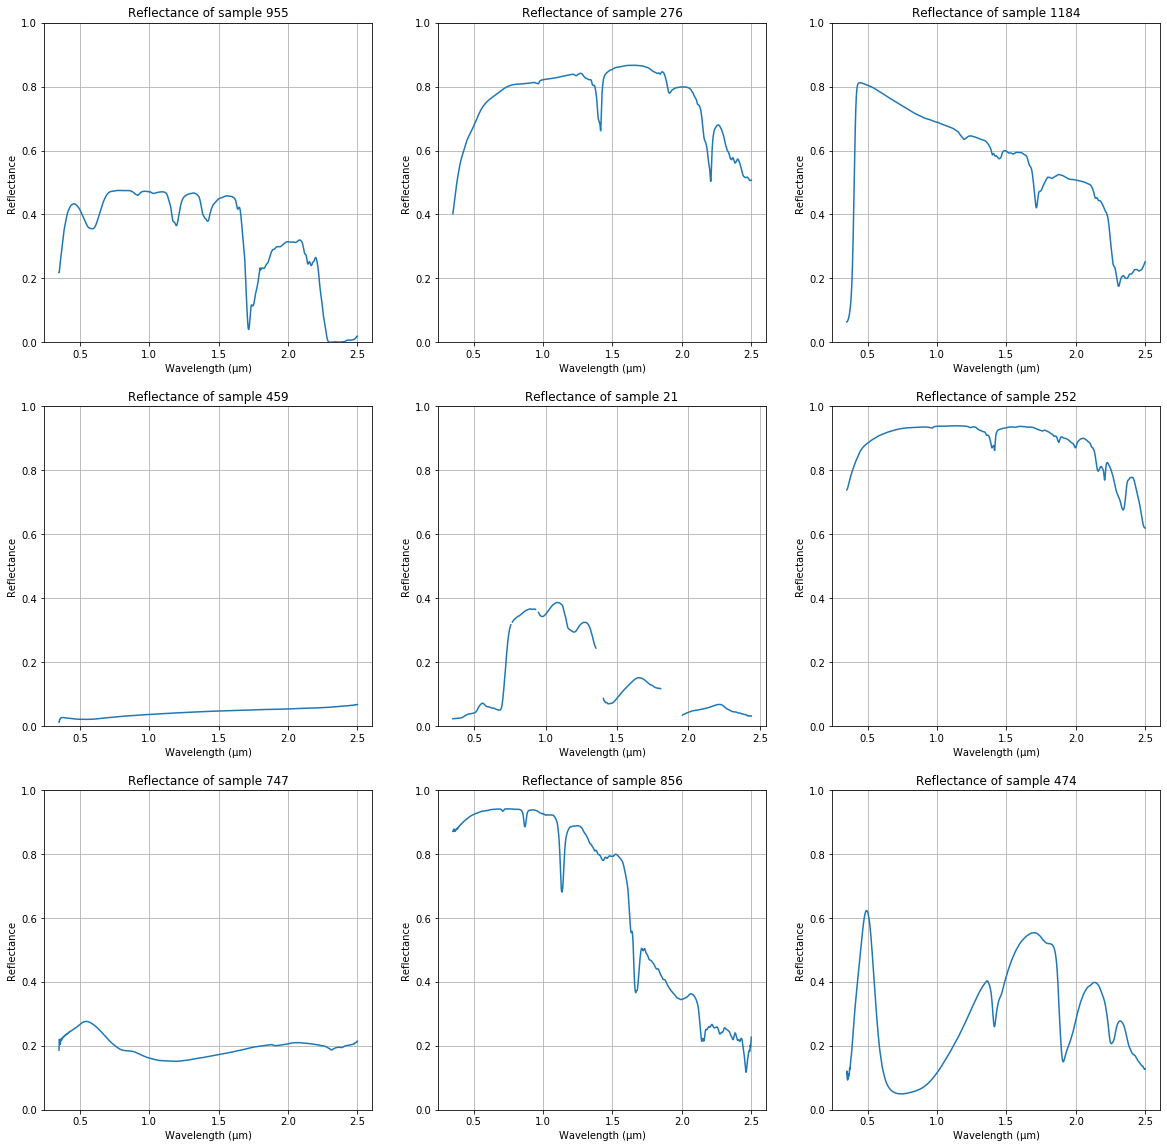

In [468]:
draw_random_sample_set()

## Handle bad bands

In [493]:
# Since it is common to run the model with a derivative (finds peaks), 
# we should drop rows with missing values for now

for i in range(len(ASD_spectra)):
    if ASD_spectra.iloc[i].isnull().sum() or any(ASD_spectra.iloc[i] < 0):
        print(ASD_spectra.iloc[i].name)
        ASD_spectra.drop(ASD_spectra.iloc[i].name, inplace=True)

# Inspect new dataframe dimensions
ASD_spectra.shape

(926, 2151)

In [494]:
ASD_spectra.head()

,0,1,2,3,4,5,6,7,8,9,...,2141,2142,2143,2144,2145,2146,2147,2148,2149,2150
splib07a Record=21532: Lodgepole-Pine LP-Needles-1 ASDFRa AREF,0.089932,0.090321,0.089357,0.088587,0.088616,0.088228,0.088036,0.087925,0.087677,0.086843,...,0.151842,0.150973,0.150530,0.150662,0.150752,0.150487,0.150494,0.150415,0.150769,0.151600
splib07a Record=24154: Antigorite+.33DryGrass AMX25 ASDFRa AREF,0.101714,0.101720,0.101727,0.101734,0.101741,0.102007,0.102267,0.102515,0.102751,0.102997,...,0.084308,0.084100,0.083913,0.083746,0.083607,0.083544,0.083617,0.083861,0.084234,0.084671
splib07a Record=21769: Oak Oak-Leaf-1 fresh ASDFRa AREF,0.110203,0.110210,0.109632,0.108983,0.108192,0.107228,0.106211,0.105302,0.104613,0.104064,...,0.116809,0.117215,0.117641,0.117990,0.118174,0.118156,0.117912,0.117435,0.116791,0.116064
splib07a Record=21072: Engelmann-Spruce ES-Needls-1 ASDFRa AREF,0.052233,0.052237,0.051909,0.051553,0.051141,0.050658,0.050145,0.049658,0.049242,0.048909,...,0.027155,0.027474,0.027713,0.027524,0.026693,0.025546,0.024541,0.024026,0.023911,0.023997
splib07a Record=22166: Willow Willow-Leaves-1 dry ASDFRa AREF,0.086303,0.086308,0.083141,0.080167,0.077579,0.075491,0.073700,0.071921,0.069952,0.067913,...,0.145196,0.145574,0.145759,0.145722,0.145444,0.144936,0.144220,0.143323,0.142299,0.141213


In [495]:
ASD_spectra.describe()

,0,1,2,3,4,5,6,7,8,9,...,2141,2142,2143,2144,2145,2146,2147,2148,2149,2150
count,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,...,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000
mean,0.286071,0.286504,0.286025,0.285431,0.285674,0.286029,0.285719,0.285739,0.286117,0.286716,...,0.339695,0.339711,0.339622,0.339399,0.339430,0.339425,0.339380,0.339450,0.339354,0.339308
std,0.257314,0.257289,0.255878,0.255288,0.255673,0.256128,0.255869,0.255928,0.255866,0.256062,...,0.231912,0.231788,0.231631,0.231488,0.231343,0.231381,0.231387,0.231241,0.231186,0.231133
min,0.000266,0.000679,0.000963,0.002061,0.002376,0.001307,0.000052,0.000855,0.001479,0.001144,...,0.001213,0.001371,0.001593,0.001793,0.001903,0.001930,0.001904,0.001850,0.001777,0.001697
25%,0.068542,0.069949,0.070428,0.070009,0.070497,0.069711,0.069918,0.069973,0.070012,0.069993,...,0.136823,0.138466,0.137998,0.138229,0.138319,0.138708,0.139375,0.139584,0.139067,0.138574
50%,0.184149,0.185691,0.185094,0.184420,0.183035,0.184723,0.183126,0.183673,0.181612,0.179671,...,0.315118,0.315430,0.313772,0.315521,0.318389,0.318888,0.316898,0.319893,0.320113,0.319739
75%,0.487611,0.488224,0.488281,0.488989,0.486658,0.489045,0.490646,0.489437,0.488424,0.489017,...,0.504422,0.503774,0.503139,0.503924,0.502395,0.502504,0.502160,0.502536,0.501910,0.502122
max,0.989046,0.989107,0.985457,0.985515,0.985571,0.985628,0.985683,0.985737,0.985789,0.990380,...,0.951277,0.948777,0.949283,0.945992,0.946206,0.948044,0.948740,0.950730,0.951187,0.950075


### Dataset is clean
ASD_spectra is now ready for analysis.
It consists of 926 spectra covering 2150 wavelengths.

Since our set has over two thousand features, our first priority should be dimensionality reduction.

## Apply PCA

In [496]:
# Instead of identifying number of components, 
# set n_components to confidence interval and let it determine n
pca = PCA(n_components = 0.99)
components = pca.fit_transform(ASD_spectra)
components

array([[ -3.73291122,   2.82494825,   5.54975175, ...,   0.50261613,
          0.05642077,  -0.53391507],
       [-14.15662692,   1.39077251,  -0.58380204, ...,  -0.01509228,
         -0.02764758,  -0.07857738],
       [ -2.12912044,   5.17167846,   7.77735658, ...,   0.63885649,
         -1.01485593,  -0.60521962],
       ...,
       [ 10.89044295,   0.0709992 ,   1.31444238, ...,   1.74771798,
         -0.55652855,  -0.13292752],
       [-14.27285989,  -1.57081352,  -0.59047839, ...,  -0.01647905,
         -0.04227186,   0.06936866],
       [  1.94038672,  -4.54565217,   1.40493476, ...,   0.08342691,
          0.20945562,   0.4164311 ]])

In [498]:
pca.explained_variance_ratio_

array([0.76686194, 0.15198556, 0.03551453, 0.01240823, 0.00669361,
       0.00563104, 0.00422089, 0.00285991, 0.00193988, 0.00183696,
       0.00166688])

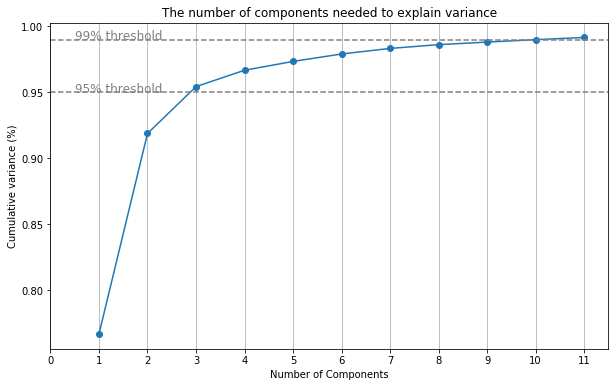

In [522]:
# Plot explained variance at 95% and 99% confidence
fig, ax = plt.subplots(figsize=(10,6))
xi = np.arange(1, 12, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.plot(xi, y, marker='o')

plt.xlabel('Number of Components')
# Make labels human-readable
plt.xticks(np.arange(0, 12, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='grey', linestyle='--')
plt.text(0.5, 0.95, '95% threshold', color = 'grey', fontsize=12)

plt.axhline(y=0.99, color='grey', linestyle='--')
plt.text(0.5, 0.99, '99% threshold', color = 'grey', fontsize=12)

ax.grid(axis='x')
plt.show()

## Plot reflectance and its first derivative

Since our datapoints have an order and we expect neighboring measurements to be similar, one approach to dimensionality reduction is to first take the derivative. 

scipy.signal import savgol_filter to smooth the derivative data out.

Why do we smooth? The reason is the wavelengths are in increasing oreder + the wavelength from one to the next are very much similar => so there shouldn't be sudden changes, if there is, then it woudl be due to noise


In [538]:
# Use picker function to examine samples
def draw_random_sample_set_with_derivatives():
    """
    Plots grid of 9 random samples for inspection
    """
    fig, axes = plt.subplots(3, 3, figsize=(20,20))
    for row in axes:
        for column in row:
            random_int = np.random.randint(0, len(ASD_spectra))
            s = ASD_spectra.iloc[random_int]
            
#             column.plot(asd_wavelengths_microns[0:-1], s[0:-1])
            
#             dx = 0.001
#             ds = np.diff(s)/dx
            ds = savgol_filter(s, 25, polyorder = 5, deriv = 1)
            
            column.plot(asd_wavelengths_microns[0:-1], ds[0:-1])
            column.set_title(f'Reflectance of sample {random_int}')
            column.set_ylabel('Reflectance')
            column.set_xlabel('Wavelength (μm)')
#             column.set_ylim(0,1)
            column.grid(1)
    plt.show()

In [ ]:
# # the first column is the labels
# lab = data.values[:, 1].astype('uint8')

# # read the features (scans) and transform data from relfectance to absorbance
# feat = np.log(1.0/(data.values[:, 2:]).astype('float32'))

# # Calculate first derivative applying a Savitzky-Golay filter
# dfeat = savgol_filter(feat, 25, polyorder = 5, deriv = 1)

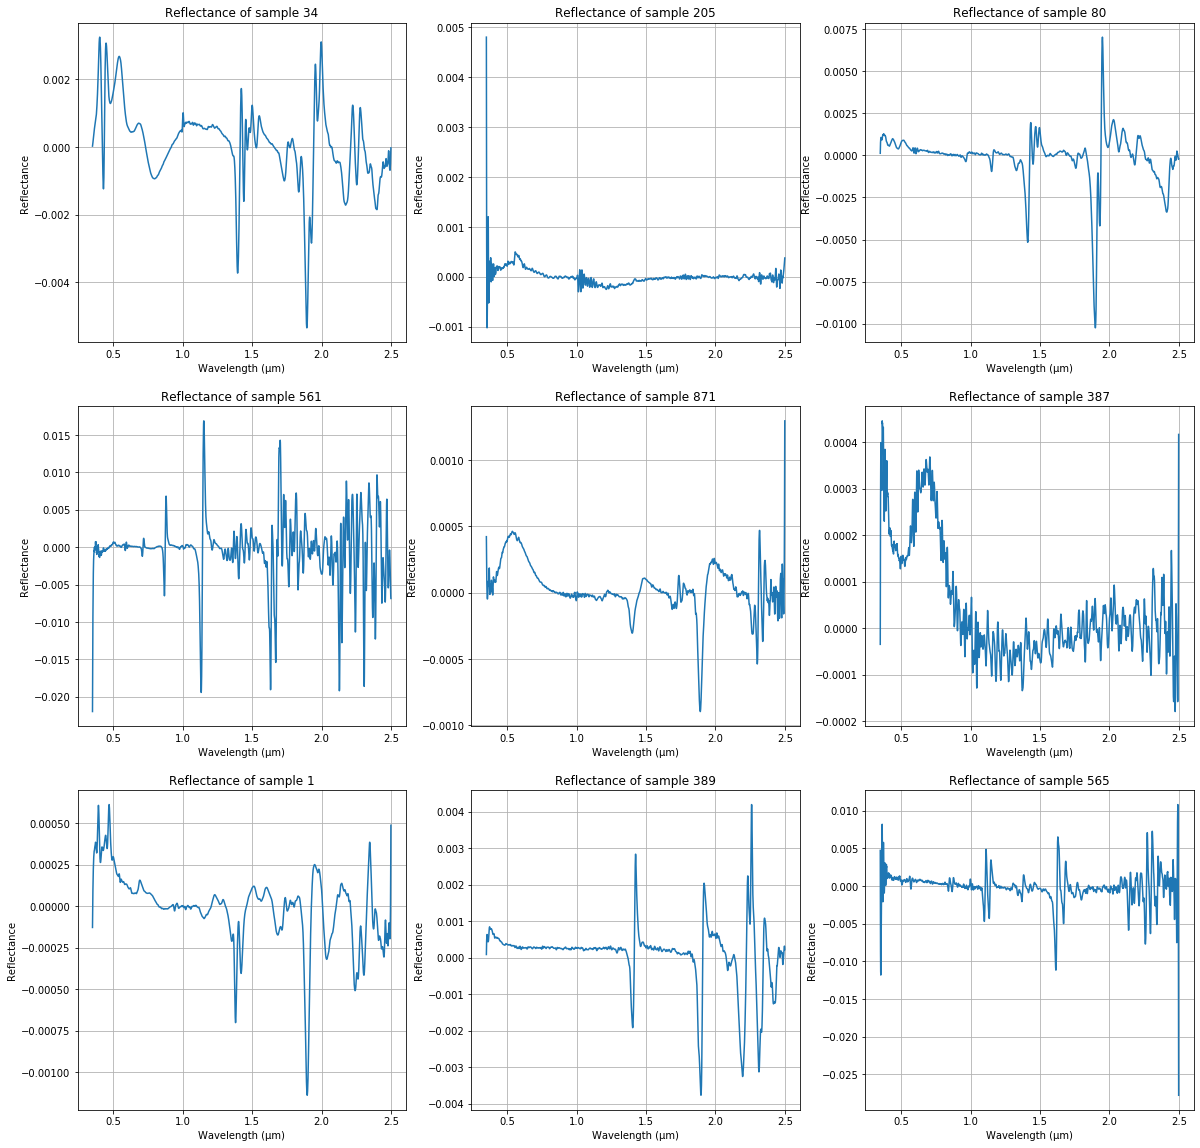

In [539]:
draw_random_sample_set_with_derivatives()

## Perform PCA as starting point


## Perform NMF

In [ ]:
# # Import NMF
# from sklearn.decomposition import NMF

# # Create an NMF instance: model
# model = NMF(n_components=6)

# # Fit the model to articles
# model.fit(articles)

# # Transform the articles: nmf_features
# nmf_features = model.transform(articles)

# # Print the NMF features
# print(nmf_features)